## Gender Pay Gap in the UK

### Business Understanding

In the UK, employers with 250 or more employees are required to calculate a series of metrics about their gender pay gap and publish them in a yearly report.

This [data](https://gender-pay-gap.service.gov.uk/) is publicly available. In this notebook the reports from 2018/19 will be analyzed since the last complete dataset available.

**Investigation 
Questions:**
1. How balanced are payment amounts by gender?
2. What economic sectors have largest gender pay gap?
3. Which employer characteristics explain the gender pay gap?
4. ~~How does gender representation influence gender pay gap~~.

### Data Understanding

Companies must report the following gender pay gap figures, calculation details can be found [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations).


| Figure                                                    | Columns                                                                                  |
|:-----------------------------------------------------------|:------------------------------------------------------------------------------------------|
| Mean gender pay gap in hourly pay                         | `DiffMeanHourlyPercent`                                                                    |
| Median gender pay gap in hourly pay                       | `DiffMedianHourlyPercent`                                                                  |
| Mean bonus gender pay gap                                 | `DiffMeanBonusPercent`                                                                     |
| Median bonus gender pay gap                               | `DiffMedianBonusPercent`                                                                   |
| Proportion of males and females receiving a bonus payment |  `(M/F)BonusPercent`                                                                |
| Proportion of males and females in each pay quartile      | `(M/F)LowQuartile, (M/F)LowerMiddleQuartile, (M/F)UpperMiddleQuartile, (M/FUpperQuartile)` |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = "serif"

In [2]:
raw = pd.read_csv("data/UK-Gender-Pay-Gap-Data-2018-2019.csv")
rows, cols = raw.shape
print(rows, "x", cols)
raw.columns

10828 x 25


Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

Apart from gender pay gap figures, the dataset includes company information such as name, size (`EmployerSize`), the industry sectors they belong to (`SicCodes`) and a URL to their writtern report (`CompanyLinkToGPGInfo`). Submission metadata is included too.

In [3]:
columns = raw.columns
non_numeric_cols = ['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
                    'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'EmployerSize',
                    'CurrentName', 'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted']
raw[non_numeric_cols].describe()

,EmployerName,Address,CompanyNumber,SicCodes,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
count,10828,10828,9486,10328,7433,9136,10828,10828,10828,10828,10828
unique,10828,9564,9486,2004,6258,7515,7,10827,2,2,10706
top,FIRST MTR SOUTH WESTERN TRAINS LIMITED,"30 Berners Street, London, England, W1T 3LR",03265272,82990,https://www.capita.com/media/3760/gender-pay-g...,Will Serle (Chief People Officer),250 to 499,CHOICE SUPPORT,False,05/04/2019 00:00:00,30/03/2019 23:59:59
freq,1,23,1,450,30,30,4896,2,10320,9058,8


In [4]:
numeric_cols = [col for col in columns if col not in non_numeric_cols]
raw[numeric_cols].describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10828.000000,10828.000000,9072.000000,9072.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000
mean,14.195447,11.897848,18.405037,-1.038779,35.707453,34.380181,46.092372,53.907628,50.158146,49.841854,54.376090,45.623910,60.241365,39.758635
std,14.243800,15.515081,218.986173,295.327384,36.675303,36.378251,24.118756,24.118756,26.191420,26.191420,26.328965,26.328965,24.496928,24.496928
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.000000,28.000000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.100000,15.550000,19.200000,17.150000,44.600000,55.400000,48.000000,52.000000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.200000,72.000000,64.500000,73.000000,72.000000,71.000000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Bonus data have minimum and maximum outliers. This will not be fixed since bonuses are not in the scope of the business questions.

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10828 entries, 0 to 10827
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10828 non-null  object 
 1   Address                    10828 non-null  object 
 2   CompanyNumber              9486 non-null   object 
 3   SicCodes                   10328 non-null  object 
 4   DiffMeanHourlyPercent      10828 non-null  float64
 5   DiffMedianHourlyPercent    10828 non-null  float64
 6   DiffMeanBonusPercent       9072 non-null   float64
 7   DiffMedianBonusPercent     9072 non-null   float64
 8   MaleBonusPercent           10828 non-null  float64
 9   FemaleBonusPercent         10828 non-null  float64
 10  MaleLowerQuartile          10828 non-null  float64
 11  FemaleLowerQuartile        10828 non-null  float64
 12  MaleLowerMiddleQuartile    10828 non-null  float64
 13  FemaleLowerMiddleQuartile  10828 non-null  flo

Crucial colummns do not miss values (employer size, hourly pay gaps and payment quartiles). `SicCodes` has 4.6% values missing (500/10.828), this problem will be address in the data preparation stage.

**Mean vs Mean Hourly Pay Gap**

Both `DiffMedianHourlyPercent` and `DiffMeanHourlyPercent` indicate the gender pay gap of the company.

       DiffMeanHourlyPercent  DiffMedianHourlyPercent
count           10828.000000             10828.000000
mean               14.195447                11.897848
std                14.243800                15.515081
min               -98.700000               -92.300000
25%                 4.900000                 0.900000
50%                13.100000                 9.500000
75%                22.400000                21.000000
max               100.000000               100.000000


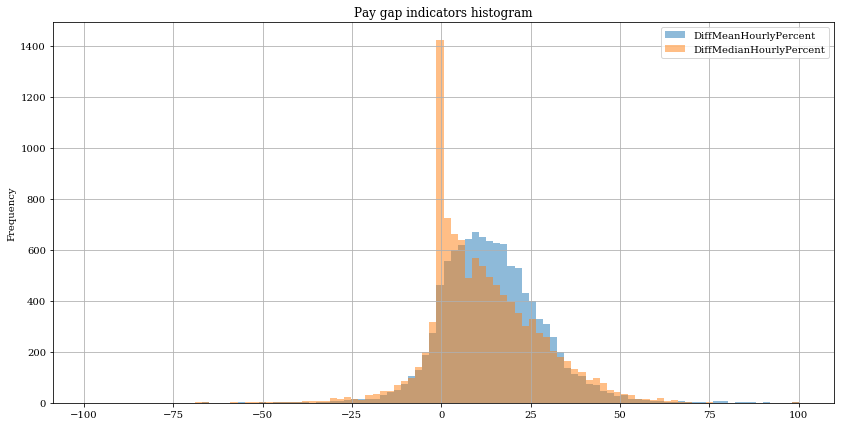

In [6]:
pay_gap_indicators = raw[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']]
print(pay_gap_indicators.describe())
pay_gap_indicators.plot.hist(bins=100, alpha=0.5, figsize=(14,7),
                             grid=True, title="Pay gap indicators histogram")

The average of the mean curve is 14.92 and the median value of the median curve is 9.5.

### Data Preparation
**Remove Irrelevant columns**

In [7]:
df = raw.drop(columns=['Address','CompanyNumber', 'CompanyLinkToGPGInfo',
                       'CurrentName', 'SubmittedAfterTheDeadline',
                       'DueDate', 'DateSubmitted', 'ResponsiblePerson'
                      ])
df.shape

(10828, 17)

**Company Size** The `EmployerSize` column contain 1 of 7 categories.

Text(0.5, 0, 'Number of Companies')

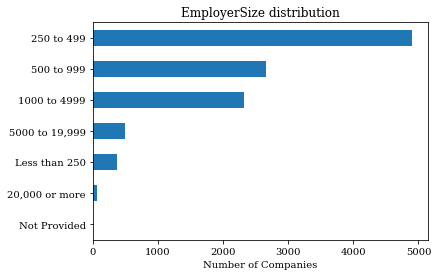

In [8]:
emp_size_dist = df.EmployerSize.value_counts().sort_values()
ax = emp_size_dist.plot.barh(title='EmployerSize distribution')
ax.set_xlabel("Number of Companies")

`EmployerSize` categorical texts will be replaced with the midpoint of the ranges they represent to have numerical. The categorical nature of this column is not affected.

In [9]:
to_replace     = ['Not Provided', 'Less than 250',  '250 to 499',  '500 to 999',
                  '1000 to 4999', '5000 to 19,999', '20,000 or more']
replace_values = [1, 150, 375, 750, 3000, 12500, 40000]
df.EmployerSize = df.EmployerSize.replace(to_replace, replace_values).astype(int)
df.EmployerSize.value_counts().sort_index()

1           9
150       373
375      4896
750      2663
3000     2326
12500     500
40000      61
Name: EmployerSize, dtype: int64

The initial categories (1, 150) and the last categories (12.500, 40.000) draw big differences. Hence, a logarithmic representation is added in order to obtain a linear representation of the sizes, this will be helfpul for the modelling phase.

In [10]:
df['EmployerSizeLog'] = pd.Series(np.log(df.EmployerSize), index=df.index)

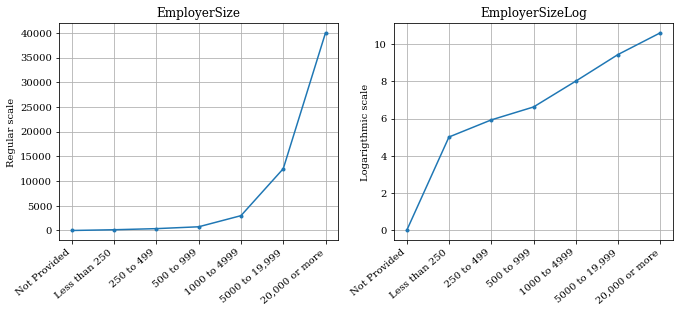

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(11,4))
axs[0].set_title("EmployerSize")
axs[0].set_ylabel("Regular scale")
axs[0].set_xticks(range(8))
axs[0].set_xticklabels(to_replace, rotation=40, ha="right")
axs[0].grid()

axs[0].plot(np.sort(df.EmployerSize.unique()), marker=".")
axs[1].set_title("EmployerSizeLog")
axs[1].set_ylabel("Logarigthmic scale")
axs[1].set_xticks(range(8))
axs[1].set_xticklabels(to_replace, rotation=40, ha="right")
axs[1].grid()
axs[1].plot(range(0,7), np.sort(df.EmployerSizeLog.unique()), marker=".")

**Q1: Payment Balance**
A [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) is suitable to represent how companies are paying their employees based in payment quartiles. Data granularization is required to plot this.

In [12]:
def extract_quartiles_by_gender(gender_str, df):
    """Returns a data frame only with a gender specific quartile percentages.
    """
    raw_cols = ['LowerQuartile', 'LowerMiddleQuartile', 'UpperMiddleQuartile', 'TopQuartile']
    quartile_cols = [gender_str + quartile for quartile in raw_cols]
    quartiles = df[quartile_cols].copy()
    quartiles.loc[:, 'Sex'] = gender_str
    quartiles.rename(columns={
        quartile_cols[0]: "Lower",
        quartile_cols[1]: "LowerMiddle",
        quartile_cols[2]: "UpperMiddle",
        quartile_cols[3]: "Top",
    }, inplace=True)
    return quartiles

In [13]:
male_quartile   = extract_quartiles_by_gender("Male", df)
female_quartile = extract_quartiles_by_gender("Female", df)
full_quartiles  = male_quartile.append(female_quartile)
print(full_quartiles.shape)
full_quartiles.sample(5)

(21656, 5)


,Lower,LowerMiddle,UpperMiddle,Top,Sex
3185,53.0,48.0,45.0,32.0,Female
7630,48.0,49.0,25.0,21.0,Female
8580,41.0,25.0,11.0,31.0,Female
4388,55.8,54.7,47.7,46.0,Female
7494,19.0,19.0,29.0,11.0,Male


In [14]:
melt_quartiles = pd.melt(full_quartiles, id_vars=['Sex'], var_name='Quartile',
    value_vars=['Lower', 'LowerMiddle', 'UpperMiddle', 'Top'],
    value_name='Percentage'
)
print(melt_quartiles.shape)
melt_quartiles.sample(5)

(86624, 3)


,Sex,Quartile,Percentage
41557,Female,LowerMiddle,53.0
10208,Male,Lower,14.9
61209,Female,UpperMiddle,20.9
79904,Female,Top,58.8
35954,Female,LowerMiddle,43.0


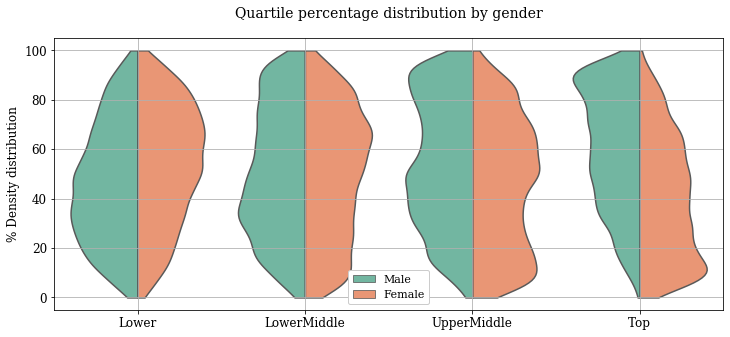

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Quartile percentage distribution by gender", fontsize=14, pad=20)
# sns.despine(left=True, bottom=True)
ax = sns.violinplot(data=melt_quartiles, x="Quartile", y="Percentage", ax=ax, hue="Sex", 
                     cut=0, split=True, inner=None, scale="count", palette="Set2")
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.grid()
plt.legend(loc='lower center', fontsize=11, framealpha=1)
ax.set_xlabel(None)
ax.set_ylabel('% Density distribution' , fontsize=12)
fig.savefig("plots/quartile-percentage-dist.png", dpi=100)

**Q1 Answer** A balance is found when both curves draw rainbow arcs, meaning that male and female employees are equally present in that payment quartile (smooth mode at 50%). From left to right (also better to worse), the lower quartile is the most balanced one with a slight preference on woman. The greatest imbalance is in the high wage quarile, where men take 80 to 100% of the salaries in the top quartile.

**Q2 Economic activities** Sic Codes are five digit encodings used to classify companies into 21 economic sections which are subdivided into 731 economic sectors. `SicCodes` column contains a list of these codes, with some missing, clutter and incorrect values (`1`).

In [16]:
df.sample(10).SicCodes

945                                   1,\r\n84110
9208                                        88990
7105                                          NaN
6873    1,\r\n85100,\r\n85200,\r\n85310,\r\n85410
6036                                        70100
1920                                        47750
2639                                        58142
8818                                        64209
9814                                        47190
7184          47210,\r\n47220,\r\n47240,\r\n47290
Name: SicCodes, dtype: object

In order to understand the industrial context of the companies this data should be extended with human undertandable descriptions. For this, [this](https://datahub.io/core/uk-sic-2007-condensed) dataset was downloaded into `data/sic_codes.csv`, it includes the mapping between sections and sectors.

In [17]:
sic_data = pd.read_csv('data/sic_codes.csv')
sic_data

,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007
...,...,...,...,...,...
726,98000,Residents property management,T,Activities of households as employers; undiffe...,SIC 2007
727,98100,Undifferentiated goods-producing activities of...,T,Activities of households as employers; undiffe...,SIC 2007
728,98200,Undifferentiated service-producing activities ...,T,Activities of households as employers; undiffe...,SIC 2007
729,99000,Activities of extraterritorial organisations a...,U,Activities of extraterritorial organisations a...,SIC 2007


In order to manage SIC sectors and section codes an independent module was implemented.

In [18]:
%load_ext autoreload
import sic_codes as sc
%autoreload 1
%aimport sic_codes

In [19]:
df2 = sc.drop_sic_codes_na(df)
print(df2.shape)
df2 = sc.clean_sic_codes(df2)
df2 = sc.add_sections(df2)
df2[["SicCodes", "SicSections"]].sample(5)

(10328, 18)


,SicCodes,SicSections
6613,"[41201, 41202, 42110, 42220]",[F]
3786,[86900],[Q]
4716,[56101],[I]
6941,[78200],[N]
8908,[85310],[P]


Many SicCodes might be included in the same section, therefore lists in `SicSection` might have less elements.

(11300, 20)


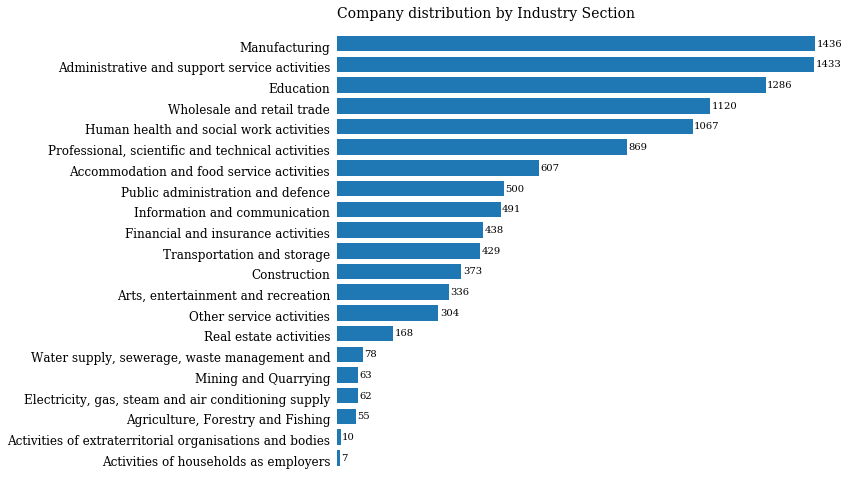

In [20]:
def plot_section_dist(df, title, filename):
    exploded_sections = sc.explode_sections(df)
    print(exploded_sections.shape)

    fig, ax = plt.subplots(1,1, figsize=(9,8))
    ax.set_title(title, fontsize='14', loc="left", pad=18)
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=True, labelsize=12
                   )
#     plt.tick_params(axis='y', which='both', labelleft=True, labelright=False, labelsize=12)
#     plt.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, labelsize=12)
#     ax.axis('off')

    section_bars = exploded_sections.SectDesc.value_counts().sort_values()

    section_bars.plot(kind='barh', ax=ax)

    for container in ax.containers:
        plt.setp(container, height=0.75)

    for i, v in enumerate(section_bars):
        ax.text(v + 4, i, str(v))
    fig.savefig(f"plots/{filename}-industry-dist.png", bbox_inches="tight", dpi=100)

plot_section_dist(df2, title="Company distribution by Industry Section", filename="general")

The previous plot shows the distribution of all companies. The total sum of the companies is bigger thant the original rows because in companies with two industrial sections have been exploded.

The following sub-distributions have been extracted with a sample of 1000 companies:
- Companies with largest pay Gap in favour of man
- Companies with largest pay Gap in favour of woman
- Companies without pay gap

(1084, 21)


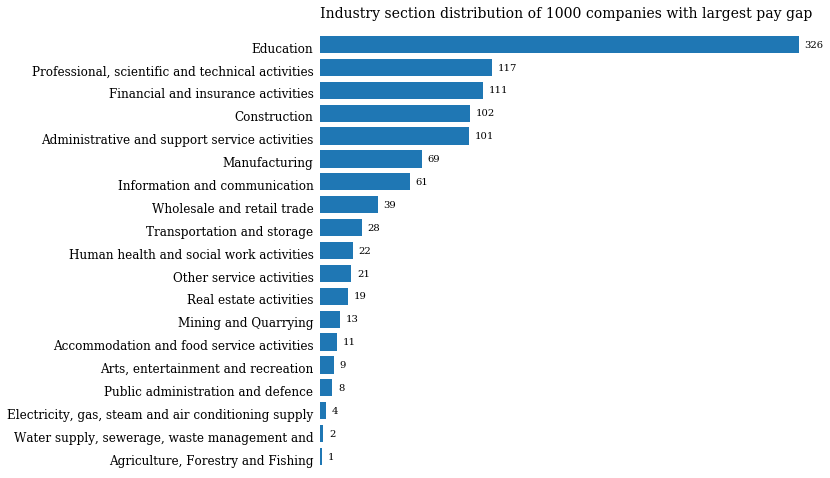

In [21]:
sample_size = 1000
sorted_median_paygap = df2.sort_values(by=['DiffMedianHourlyPercent']).copy().reset_index()
male_biased   = sorted_median_paygap.tail(sample_size)
plot_section_dist(male_biased, "Industry section distribution of 1000 companies with largest pay gap", filename="male")

**Q2 Answer** Education sector conforms the 30% of the "bad" companies. The following four groups conform 10 to 12%. Three involve technical activities such as finances, insurances and construction. Also administrative roles but this because there are so many. The rest of the companies groups are less than 10%.

(1097, 21)


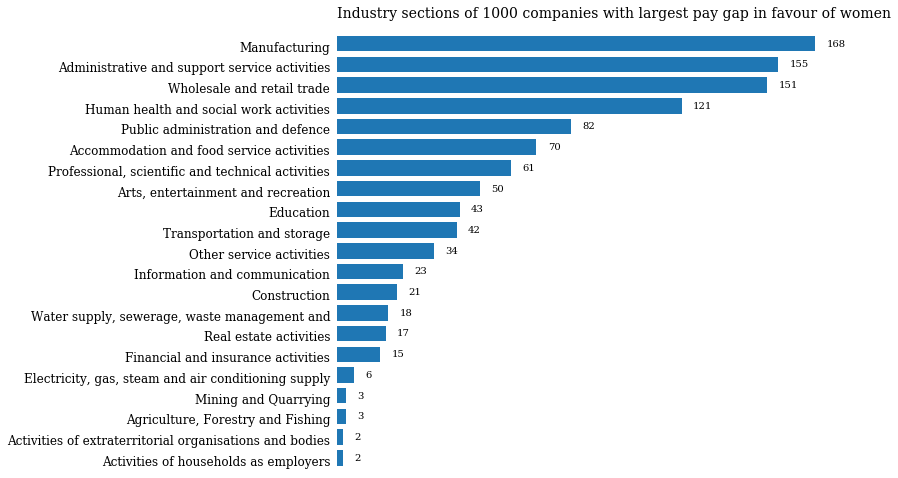

In [22]:
female_biased = sorted_median_paygap.head(sample_size)
plot_section_dist(female_biased, title="Industry sections of 1000 companies with largest pay gap in favour of women", filename="female")

In [23]:
zero_median_gap = sorted_median_paygap[sorted_median_paygap.DiffMedianHourlyPercent == 0]
zero_median_gap_count = zero_median_gap.shape[0]
print(zero_median_gap_count, "have zero median pay gap")

# Include companies close to zero median gap by building a new index.
side_pad = int((sample_size - zero_median_gap_count) / 2) + 1
balanced_companies_idx = range(zero_median_gap.index[0] - side_pad,
                               zero_median_gap.index[-1]+ side_pad)

print("Sample balanced companies index", balanced_companies_idx)
balanced = sorted_median_paygap.iloc[balanced_companies_idx] 
balanced.DiffMedianHourlyPercent.describe()

895 have zero median pay gap
Sample balanced companies index range(1378, 2378)


count    1000.00000
mean       -0.00090
std         0.04279
min        -0.20000
25%         0.00000
50%         0.00000
75%         0.00000
max         0.20000
Name: DiffMedianHourlyPercent, dtype: float64

(1081, 21)


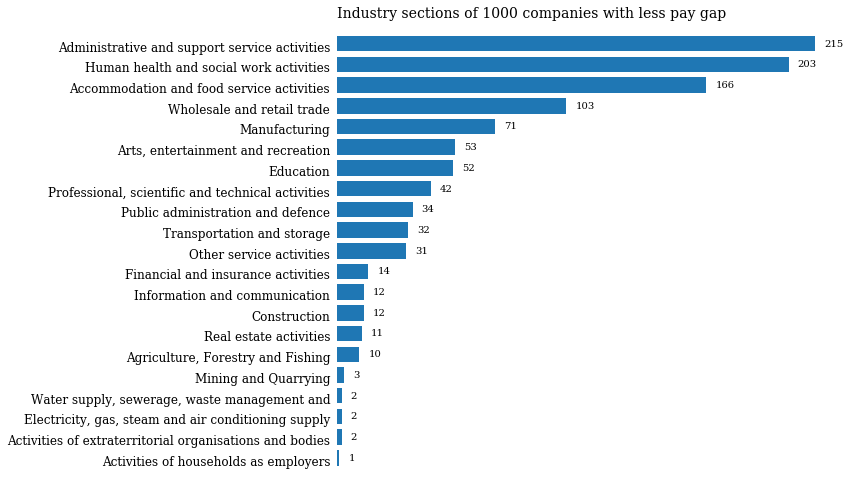

In [24]:
plot_section_dist(balanced, title="Industry sections of 1000 companies with less pay gap", filename="balance")

**Split Industry Sections**

The `sc.split_sections` function distributes the list of industry codes and extends the DataFrame with 21 new columns `SectA`, `SectB` … `SectU` which indicate whether the company belongs to a particular section (1) or not (0).

In [25]:
df3 = sc.split_sectors(df2)
print(df3.shape)
df3.head()

(10328, 40)


,EmployerName,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,...,SectL,SectM,SectN,SectO,SectP,SectQ,SectR,SectS,SectT,SectU
0,"""Bryanston School"",Incorporated",[85310],19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,...,0,0,0,0,1,0,0,0,0,0
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED",[47730],7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,...,0,0,0,0,0,0,0,0,0,0
2,118 LIMITED,[61900],7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,...,0,0,0,0,0,0,0,0,0,0
3,123 EMPLOYEES LTD,[78300],30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,...,0,0,1,0,0,0,0,0,0,0
4,1509 GROUP,"[85200, 85310]",13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,...,0,0,0,0,1,0,0,0,0,0


### Data Modelling

**Q3: Which company characteristics influence the pay gap** `DiffHourlyMedianPercent` will be modelled with Linear Regression and Random Forest algorithms in order to find the most influencial characteristics of company when estimating the pay gap.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [27]:
features = ['MaleLowerQuartile', 'FemaleLowerQuartile',
#             'DiffMeanBonusPercent', 'DiffMedianBonusPercent',
#             'MaleBonusPercent', 'FemaleBonusPercent',
            'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
            'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
            'MaleTopQuartile', 'FemaleTopQuartile', 
            'EmployerSize', 'EmployerSizeLog',
            'SectA', 'SectB', 'SectC', 'SectD', 'SectE', 'SectF', 'SectG',
            'SectH', 'SectI', 'SectJ', 'SectK', 'SectL', 'SectM', 'SectN',
            'SectO', 'SectP', 'SectQ', 'SectR', 'SectS', 'SectT', 'SectU']

target = 'DiffMedianHourlyPercent'
X = df3[features]
y = df3[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Linear Regression**

In [28]:
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)

y_preds = linear_reg.predict(X_test)
score = r2_score(y_test, y_preds)
score

0.4540445585261679

In [29]:
coeffs = pd.DataFrame({'Column': list(X_train.columns), 'Coeff': linear_reg.coef_})
coeffs['AbsCoeff'] = abs(coeffs['Coeff'])
coeffs.sort_values(by=["AbsCoeff"], ascending=False)

,Column,Coeff,AbsCoeff
4,MaleUpperMiddleQuartile,337477764488.444824,337477764488.444824
5,FemaleUpperMiddleQuartile,337477764488.147034,337477764488.147034
2,MaleLowerMiddleQuartile,-231440150897.071930,231440150897.071930
3,FemaleLowerMiddleQuartile,-231440150896.794464,231440150896.794464
6,MaleTopQuartile,2630754441.182331,2630754441.182331
7,FemaleTopQuartile,2630754440.710888,2630754440.710888
1,FemaleLowerQuartile,79466049.487960,79466049.487960
0,MaleLowerQuartile,79466048.960446,79466048.960446
15,SectF,7.629863,7.629863
25,SectP,6.692321,6.692321


**Random Forest**

In [30]:
rand_for = RandomForestRegressor(random_state=1)
rand_for.fit(X_train, y_train)

y_preds = rand_for.predict(X_test)
score = r2_score(y_test, y_preds)
score

0.5050968271334224

In [31]:
coeffs2 = pd.DataFrame({'Column': list(X_train.columns), "Importance(%)": rand_for.feature_importances_ * 100})
coeffs2.sort_values(by=["Importance(%)"], ascending=False)

,Column,Importance(%)
0,MaleLowerQuartile,18.298891
1,FemaleLowerQuartile,16.885269
6,MaleTopQuartile,15.772995
7,FemaleTopQuartile,14.729421
25,SectP,6.248257
2,MaleLowerMiddleQuartile,5.178556
3,FemaleLowerMiddleQuartile,5.153752
4,MaleUpperMiddleQuartile,4.980063
5,FemaleUpperMiddleQuartile,4.866054
8,EmployerSize,0.933773



### Results Evaluation

The best trained model was Random Forest, it performed 0.505 in $R2$ score with test data. Even though this is not a high value, the feature importance complement the previous analysis and add new insights to the data. 

**Q3 Answer** The most influencing characteristics of the company are the pay balance in the lower and top quartiles, followed by the question wether the company belongs to education or not. Next, midd quartiles are relevant for the decision. Surprisingly, the Employer size is irrelevant together with the rest of the industry sections.

### Deployment

Key insights:
- Man predominantly are in the top quartile taking the highest salaries.
- Employers in education and other technical economic activities tend to have large pay gaps.
- Lower quartiles and top quartiles are key indicators to predict a company's pay gap.
- The size of the company does not influence the pay gap.